In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [4]:
atmo.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80234,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25686,3.42414,22.88710,3.26208,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05470,24.33140,9.66974,2.66706,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95274,16.83320,27.91820,18.74930,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32084,3.04405,91.82640,5.22213,0,0.321967,0.000000,2,2062.8600,0


In [5]:
pdk.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58654,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64484,4.02827,51.2072,7.49073,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44040,14.6574,3.74200,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86520,11.28500,34.3021,22.75140,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38759,9.70459,50.4080,12.87600,0,0.227076,0.868688,1,56.5050,1


In [6]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [7]:
import seaborn as sb

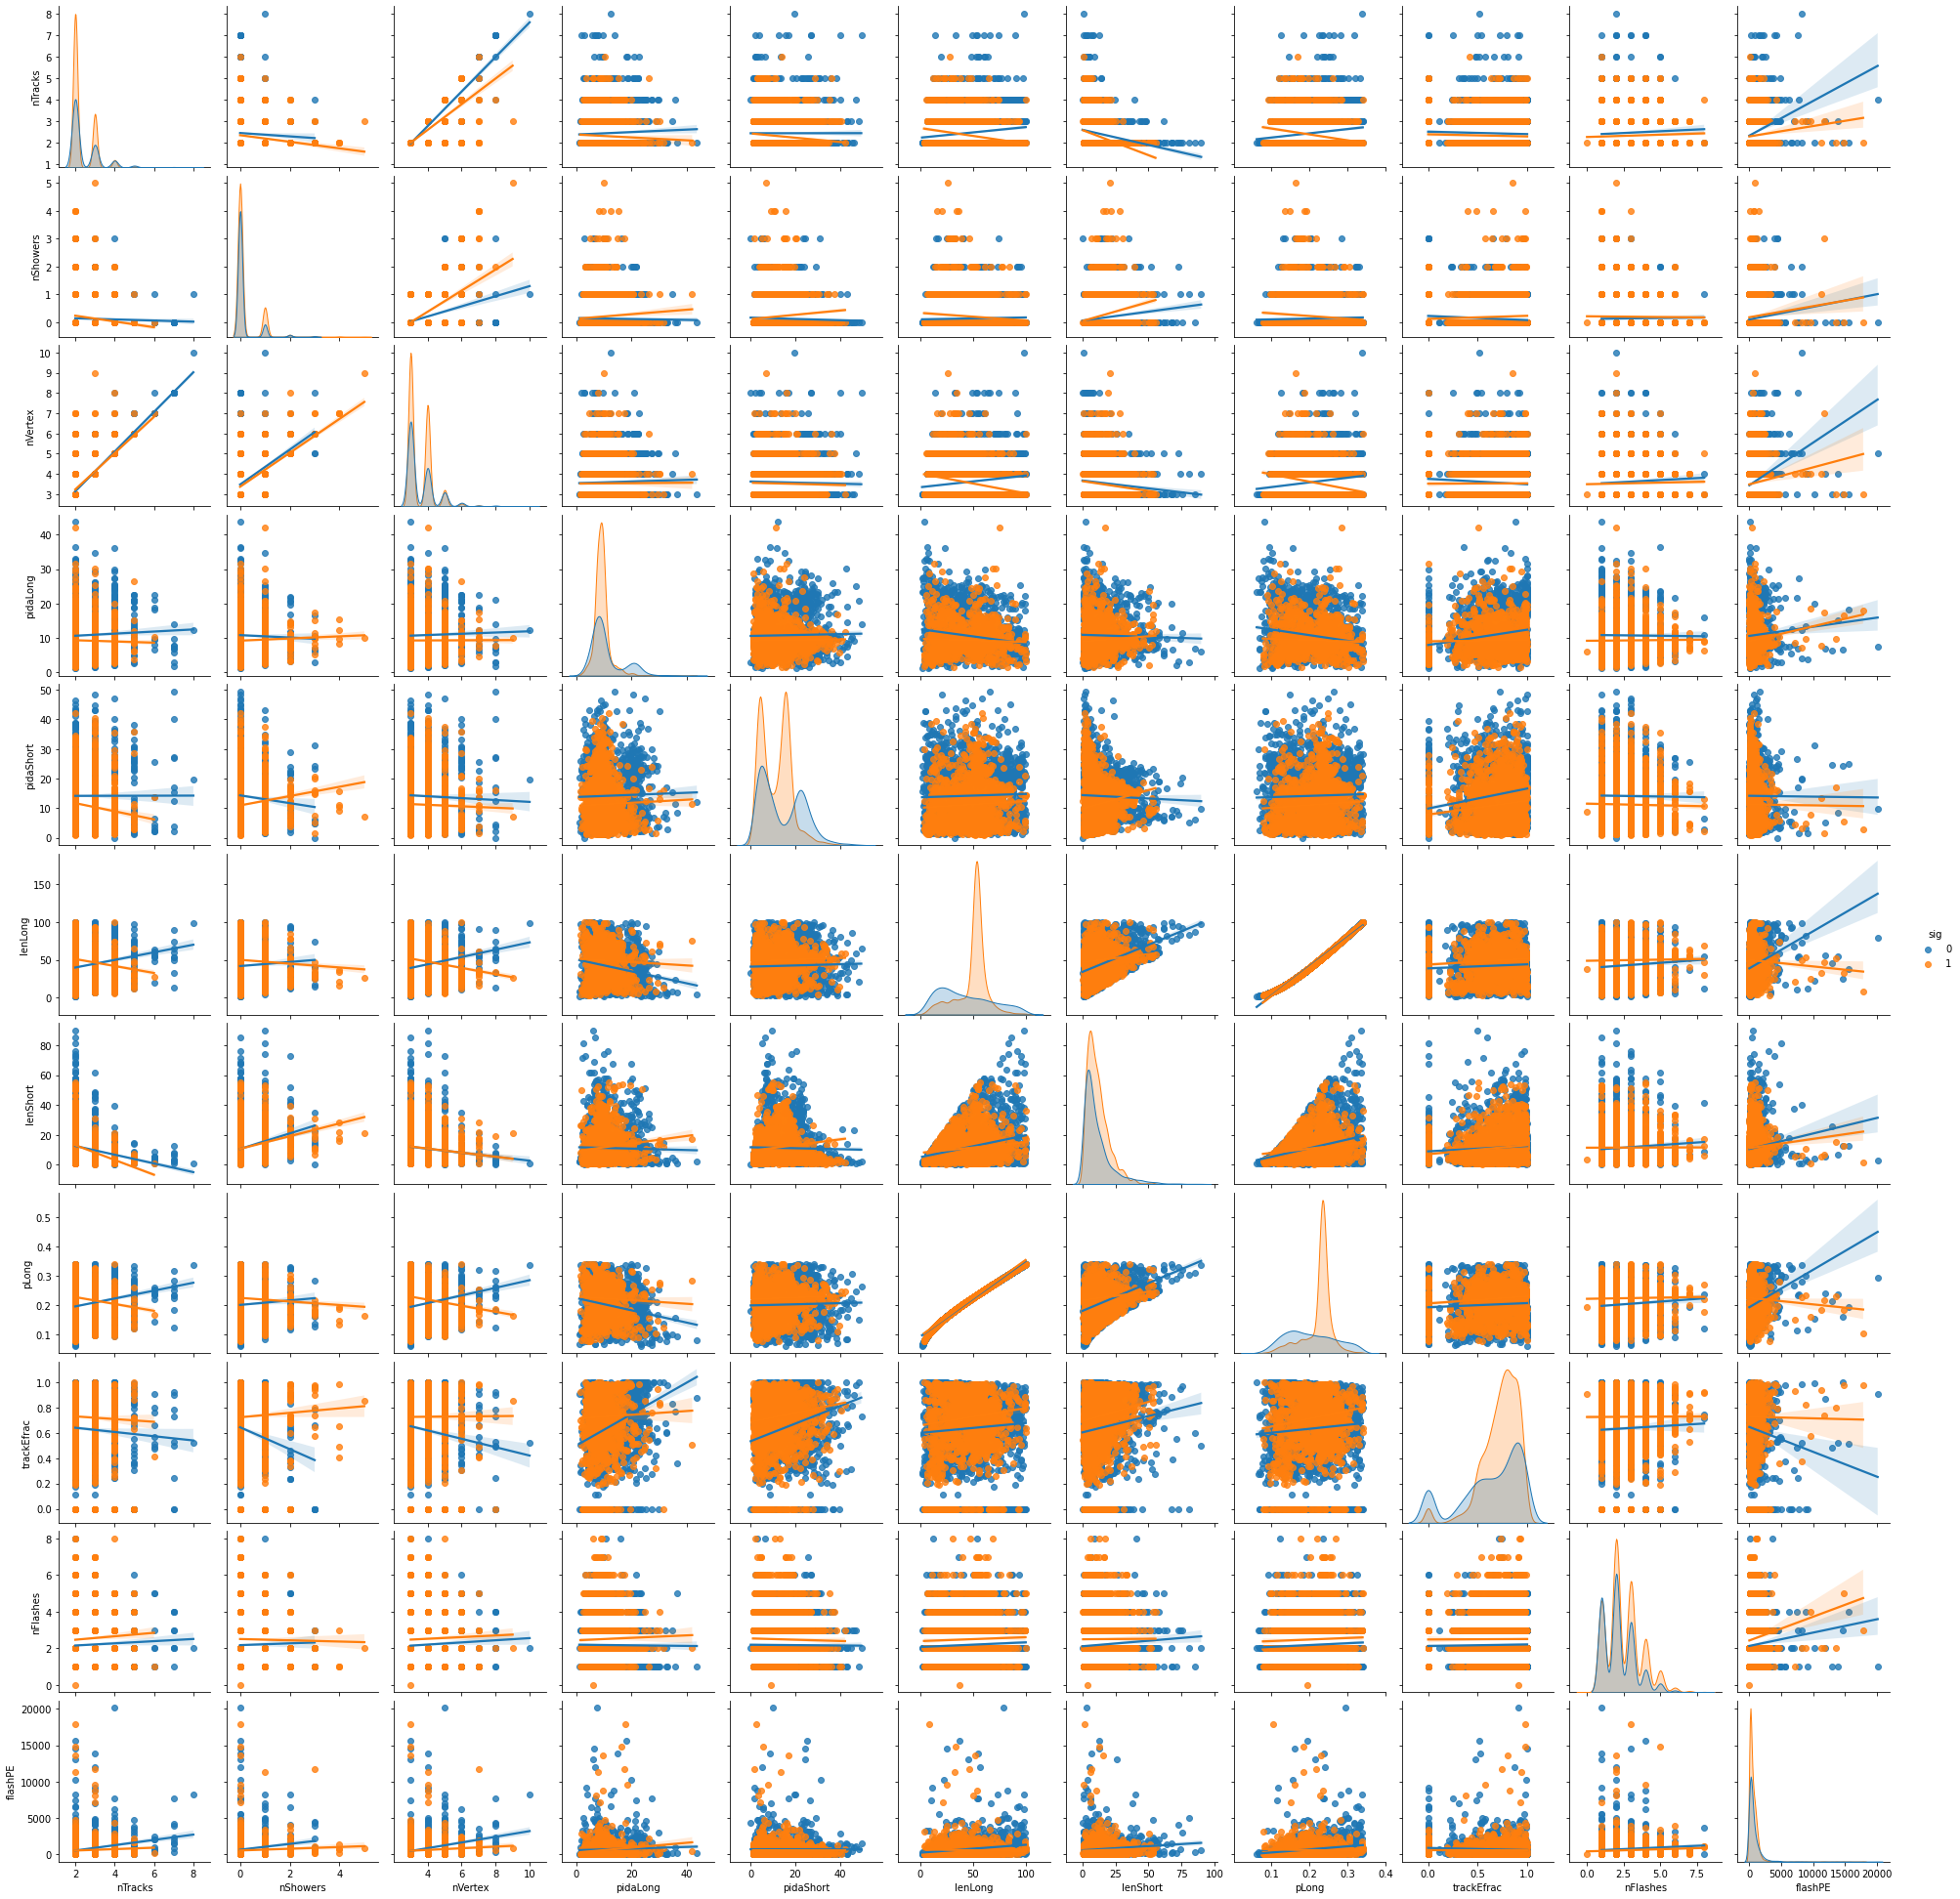

In [8]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [9]:
pdk_target = pdk_df.sig

### Pull off the "signal" column to use as the target for our ML models

In [10]:
pdk_target
pdk_df=pdk_df.drop(["sig"],axis=1)

### Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [11]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
3915,2,0,3,9.65064,23.33900,55.0684,5.12887,0.238196,0.589928,3,486.1030
3101,2,0,3,9.07920,8.50395,51.4298,4.68041,0.229529,0.674212,1,91.0362
1897,2,0,3,7.12616,2.82079,26.3567,0.96766,0.165086,0.815468,1,63.1766
2392,2,0,3,9.74155,15.55950,56.1559,28.93560,0.240768,0.971698,1,1068.9000
4832,3,0,4,7.94811,16.22370,41.6284,9.30392,0.205581,0.488287,2,1940.0400


In [12]:
y_train.head()

3915    1
3101    1
1897    0
2392    1
4832    1
Name: sig, dtype: int64

In [13]:
from sklearn import tree
from sklearn import svm

## Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [14]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

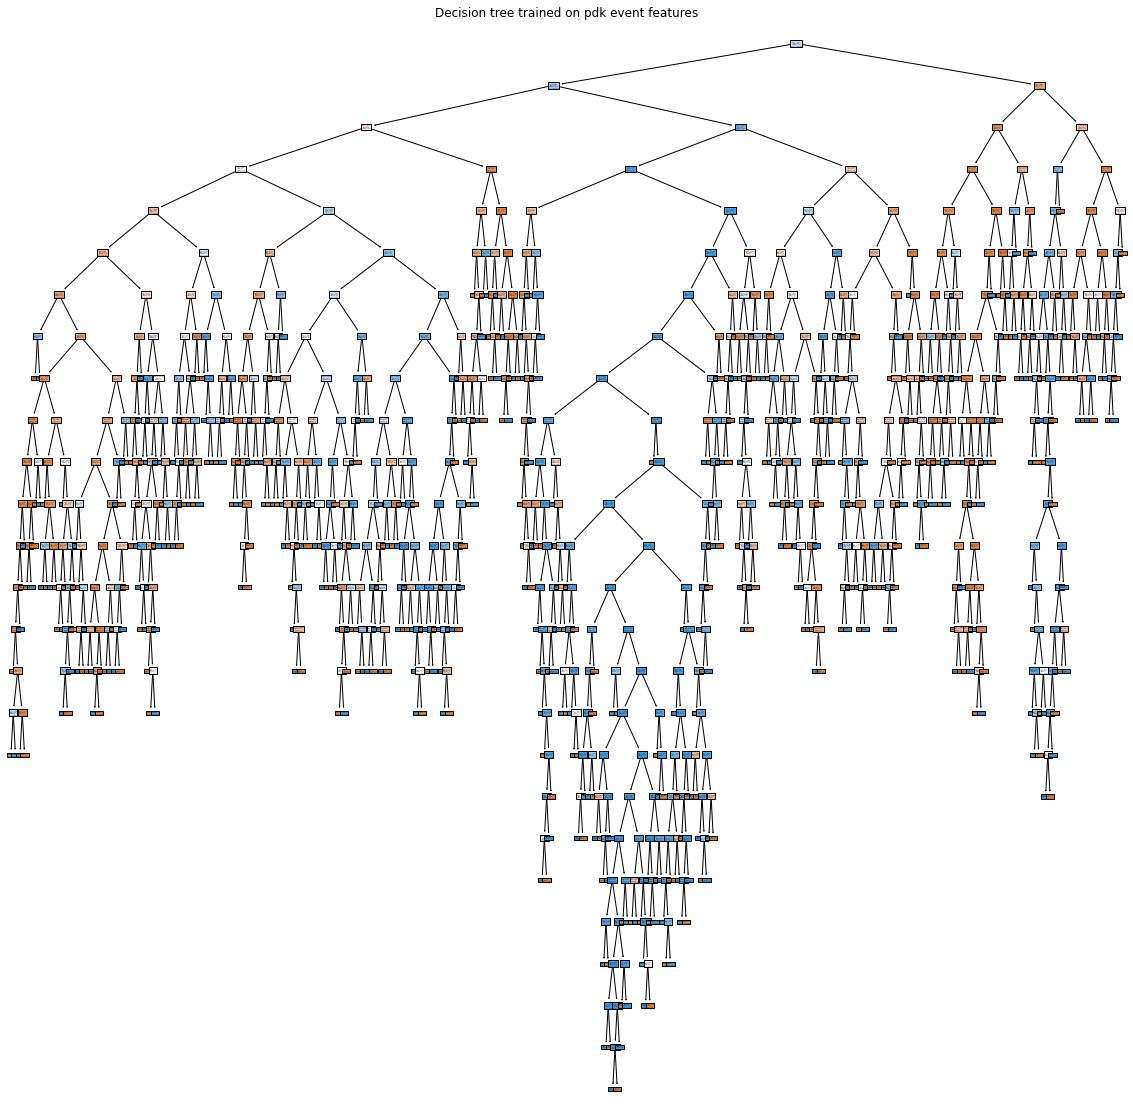

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [16]:
clf.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
clf_score = clf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", clf_score )

The score of the Decision tree classifier is  0.7639060568603214


In [18]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

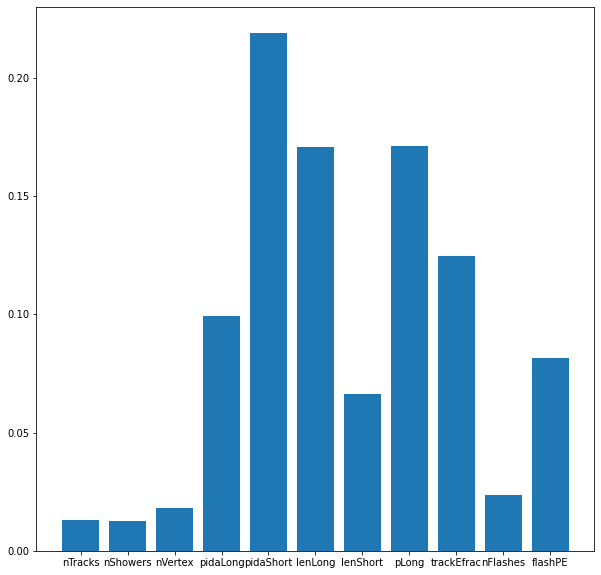

In [19]:
plt.figure(figsize=[10,10])
plt.bar(head_list,clf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

## Here we try a Gradient Boosting Classifier

In [20]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [21]:
gbc = ensemble.GradientBoostingClassifier()

In [22]:
gbc.fit(X_train,y_train)
gbc_preds=gbc.predict(X_test)

In [23]:
gbc_score= gbc.score(X_test,y_test)
print(gbc_score)

0.842398022249691


It does pretty okay, but can we improve some

In [24]:
classification_report(y_test,gbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.80      0.80      0.80       637\n           1       0.87      0.87      0.87       981\n\n    accuracy                           0.84      1618\n   macro avg       0.83      0.84      0.83      1618\nweighted avg       0.84      0.84      0.84      1618\n'

In [25]:
confusion_matrix(y_test,gbc_preds)

array([[510, 127],
       [128, 853]])

In [26]:
y_scores_gb = gbc.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.92


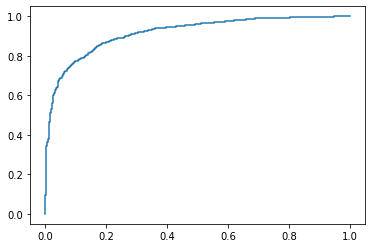

In [27]:
plt.figure()
plt.plot(fpr_gb,tpr_gb)

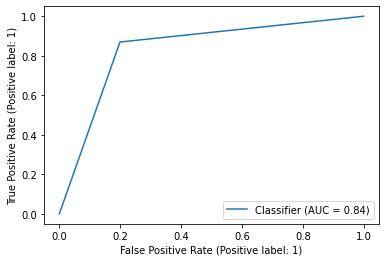

In [28]:
RocCurveDisplay.from_predictions(y_test,gbc_preds)

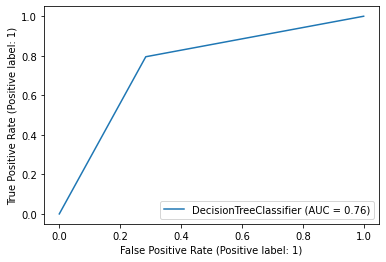

In [29]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

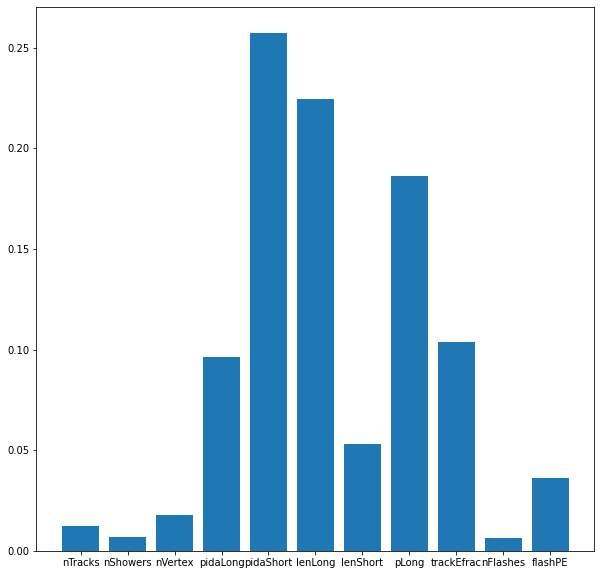

In [30]:
plt.figure(figsize=[10,10])
plt.bar(head_list,gbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [31]:
gbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
gbc500.fit(X_train,y_train)
gbc500.score(X_test,y_test)

0.8430160692212608

In [32]:
gbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
gbc5.fit(X_train,y_train)
gbc5.score(X_test,y_test)

0.8337453646477132

In [33]:
gbc.feature_importances_

array([0.01227982, 0.00696169, 0.01792121, 0.09629445, 0.25725498,
       0.22428612, 0.05288557, 0.18606417, 0.10366909, 0.00640588,
       0.03597703])

## What about an SVC? 

In [34]:
svc = svm.NuSVC(gamma="auto")
svc.fit(X_train,y_train)
svc_score=svc.score(X_test,y_test)
print (svc_score)

0.619283065512979


In [35]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)

# OKAY, let us do the same thing but for the flash matched set

In [36]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_flash = pd.read_csv("atmotree_flash.csv",names=head_list,header=None,index_col=False)
pdk_flash = pd.read_csv("pdktree_flash.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [37]:
atmo_flash.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80235,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25687,3.42417,22.88720,3.26216,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05480,24.33480,9.66977,2.66716,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95286,16.83320,27.91830,18.74940,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32089,3.04405,91.82640,5.22212,0,0.321967,0.000000,2,2062.8600,0


In [38]:
pdk_flash.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58657,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64485,4.02850,51.2072,7.49075,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44160,14.6574,3.74199,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86530,11.28540,34.3021,22.75130,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38758,9.70308,50.4079,12.87360,0,0.227075,0.868688,1,56.5050,1


In [39]:
pdk_fdf = atmo_flash
pdk_fdf=pdk_fdf.append(pdk_flash,ignore_index=True)
pdk_fdf=pdk_fdf.drop(["trkE","EmE","visE"],axis=1)

In [40]:
import seaborn as sb

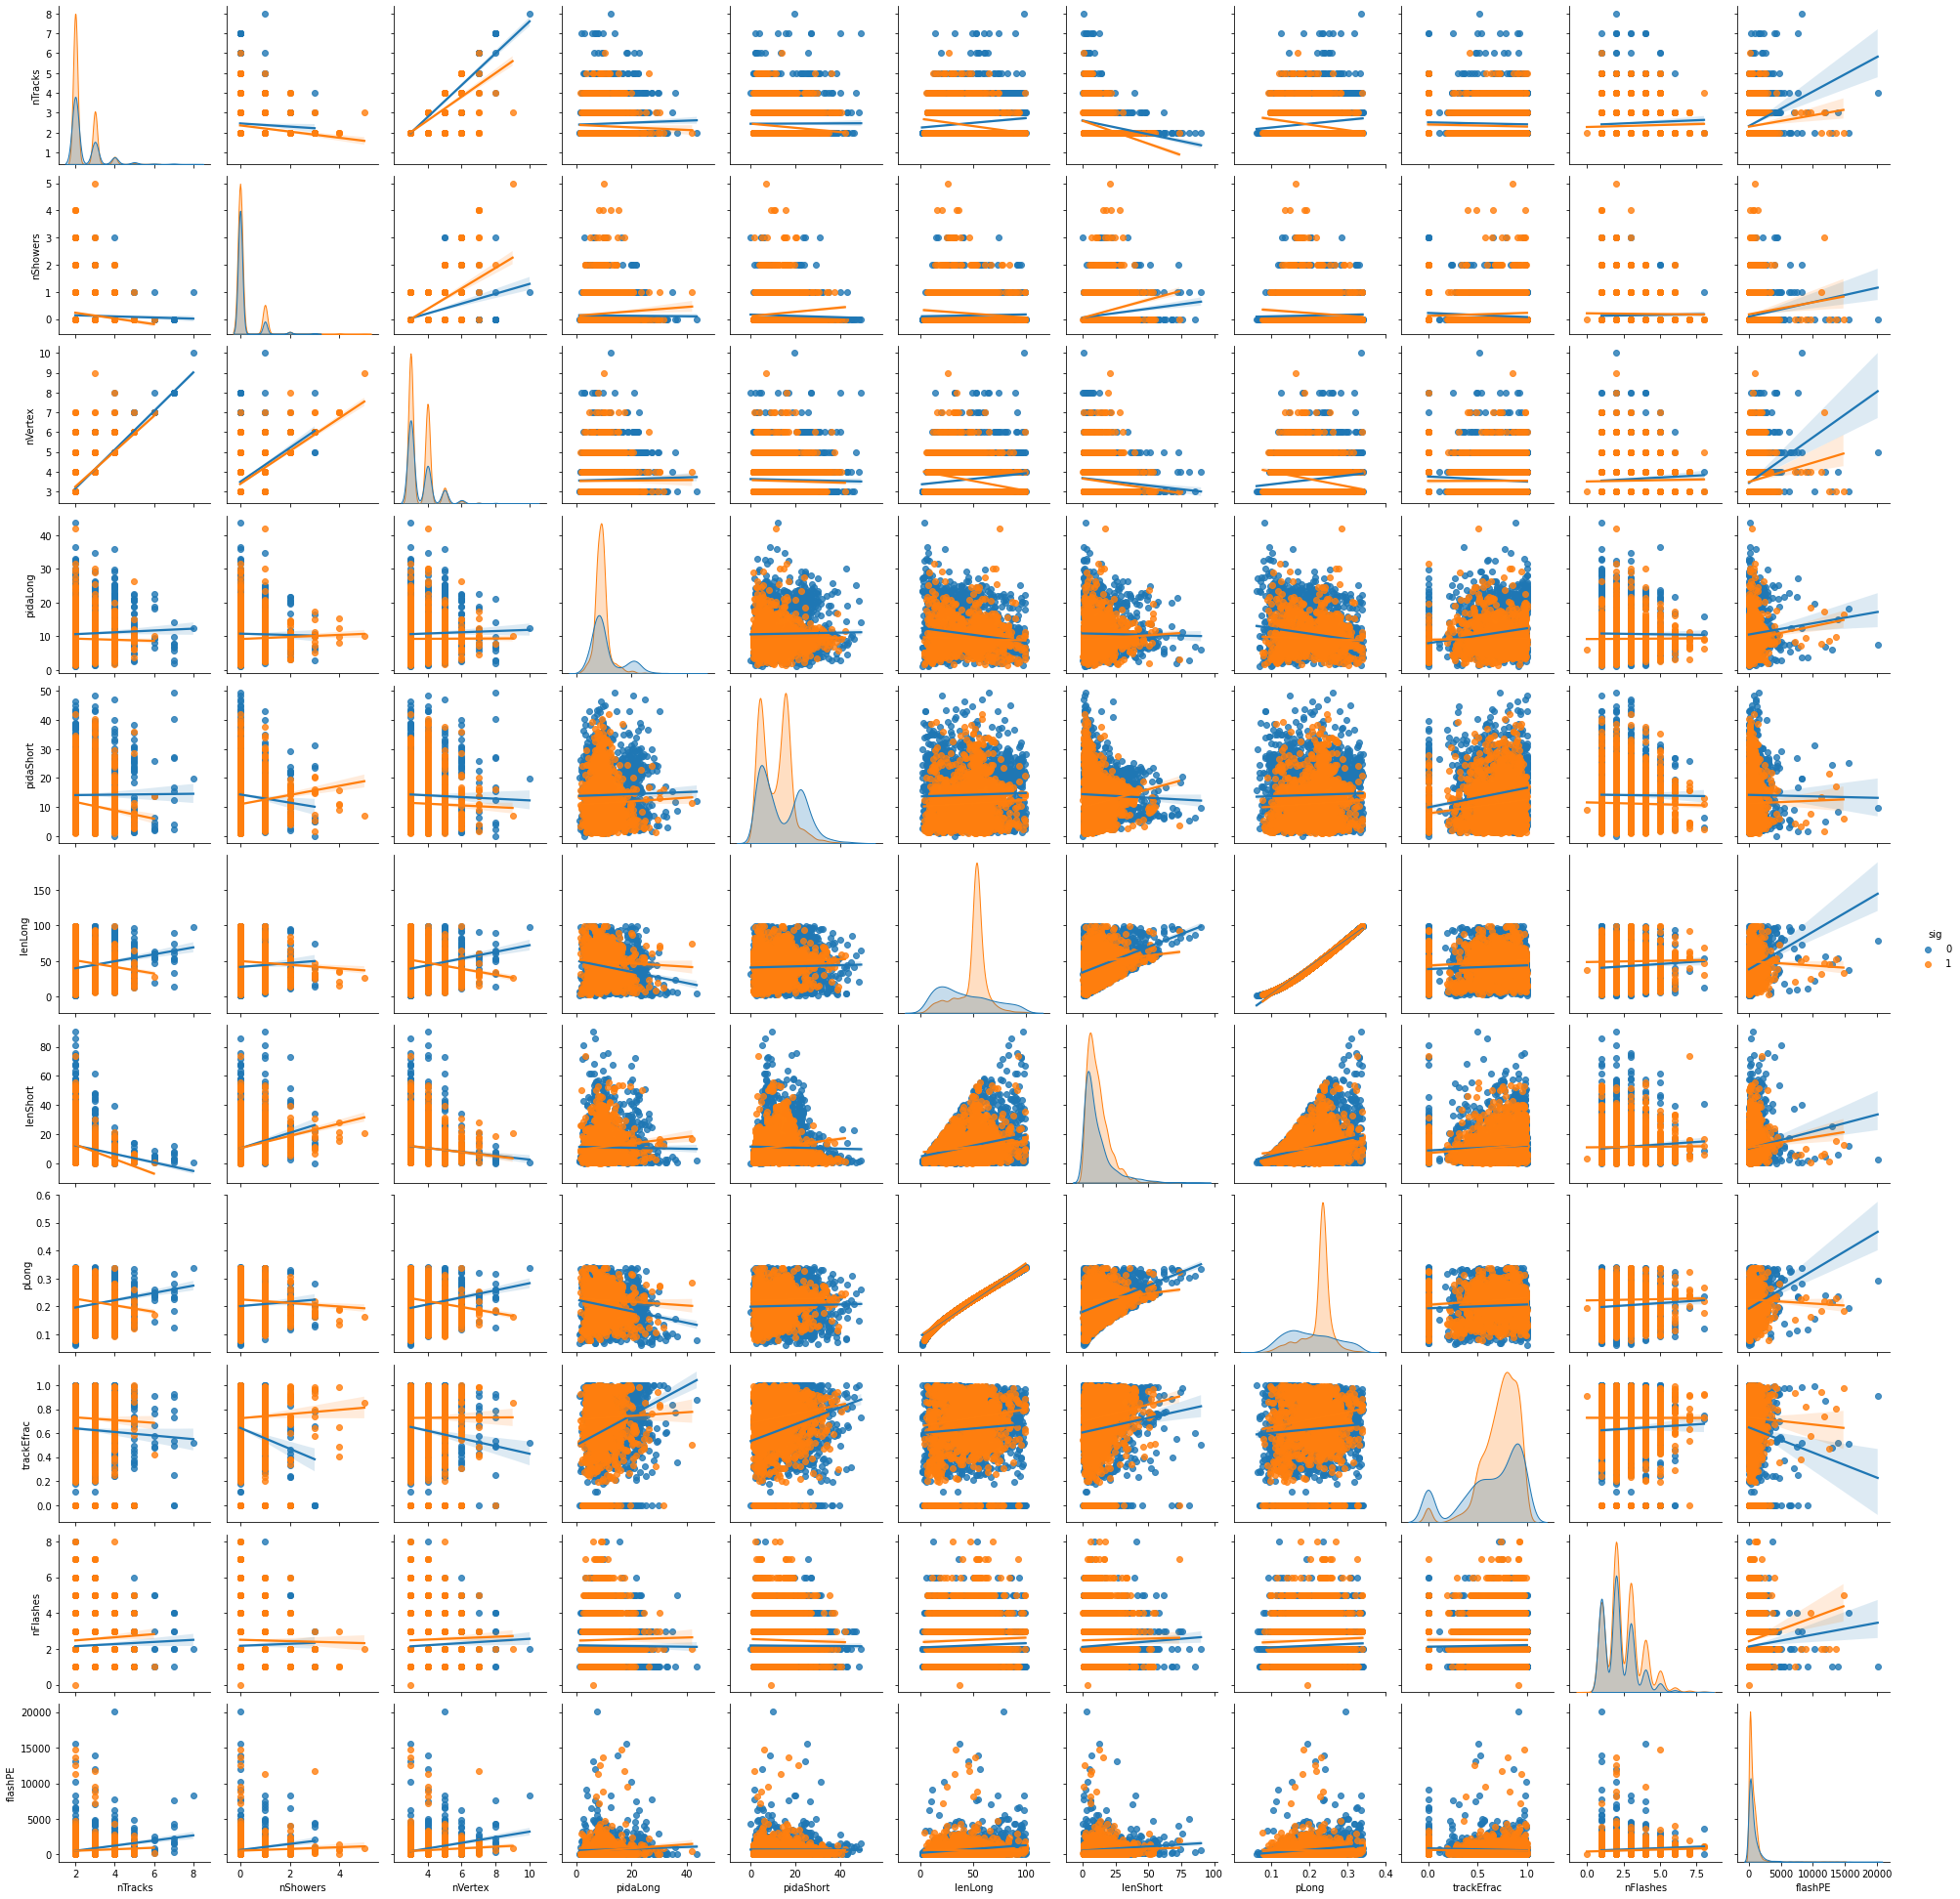

In [41]:
sb.pairplot(data=pdk_fdf,kind="reg",hue="sig")

In [42]:
pdk_ftarget = pdk_fdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [43]:
pdk_ftarget
pdk_fdf=pdk_fdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [44]:
Xf_train, Xf_test, yf_train, yf_test =train_test_split(pdk_fdf, pdk_ftarget, test_size = 0.3)
Xf_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
565,2,0,3,21.29750,22.40790,9.38157,4.62954,0.108474,0.558708,1,170.548
3536,2,0,3,11.08450,33.21230,68.66250,3.32801,0.269818,0.604021,3,895.884
1108,3,0,4,7.40091,10.62260,92.15670,15.82110,0.322700,0.263579,1,540.273
2569,2,0,3,14.57390,5.98989,71.64540,9.72025,0.276631,0.261755,3,418.911
3526,3,0,4,8.25857,13.49740,40.38170,6.97032,0.202451,0.692096,3,1099.140


In [45]:
yf_train.head()

565     0
3536    1
1108    0
2569    1
3526    1
Name: sig, dtype: int64

In [46]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [47]:
Fclf=tree.DecisionTreeClassifier()
Fclf.fit(Xf_train,yf_train)

DecisionTreeClassifier()

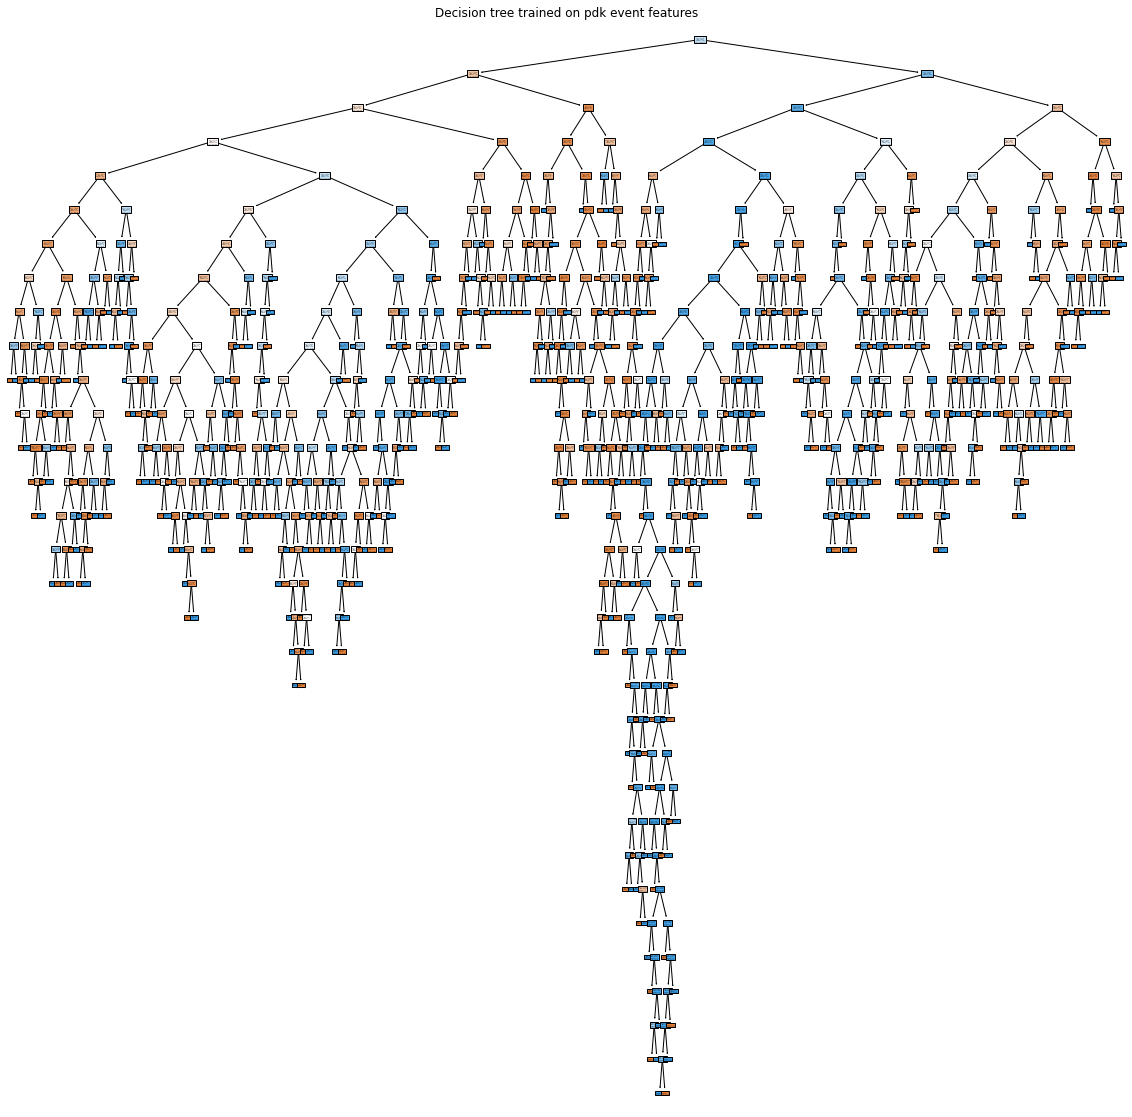

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(Fclf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [49]:
Fclf.predict(X_test)

array([1, 0, 1, ..., 1, 1, 1])

In [50]:
Fclf_score= Fclf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", Fclf_score)

The score of the Decision tree classifier is  0.927070457354759


In [51]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

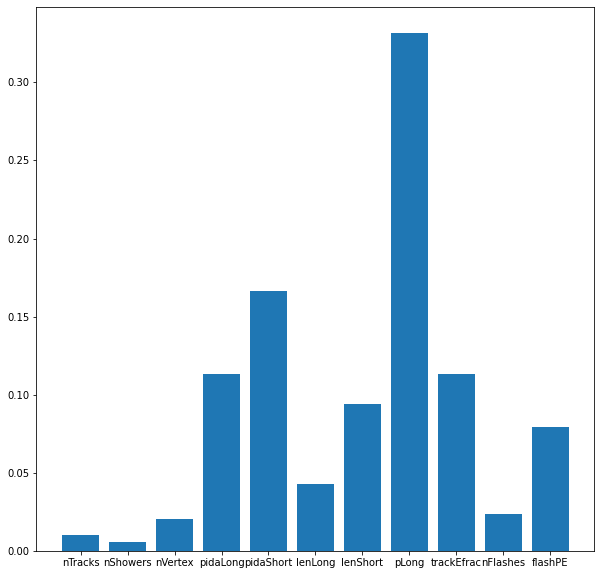

In [52]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

# Here we try a Gradient Boosting Classifier

In [53]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [54]:
Fgbc = ensemble.GradientBoostingClassifier()

In [55]:
Fgbc.fit(Xf_train,yf_train)
Fgbc_preds=gbc.predict(Xf_test)

In [56]:
Fgbc_score = Fgbc.score(Xf_test,yf_test)
print(Fgbc_score)

0.8444444444444444


It does pretty okay, but can we improve some

In [57]:
classification_report(yf_test,Fgbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.85       672\n           1       0.90      0.89      0.89       948\n\n    accuracy                           0.88      1620\n   macro avg       0.87      0.87      0.87      1620\nweighted avg       0.88      0.88      0.88      1620\n'

In [58]:
confusion_matrix(yf_test,Fgbc_preds)

array([[575,  97],
       [103, 845]])

In [59]:
yf_scores_gb = Fgbc.decision_function(Xf_test)
ffpr_gb, ftpr_gb, _ = roc_curve(yf_test, yf_scores_gb)
froc_auc_gb = auc(ffpr_gb, ftpr_gb)

print("Area under ROC curve = {:0.2f}".format(froc_auc_gb))

Area under ROC curve = 0.91


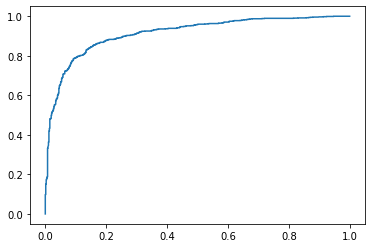

In [60]:
plt.figure()
plt.plot(ffpr_gb,ftpr_gb)

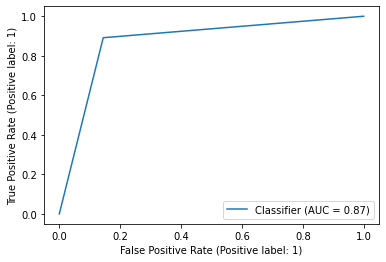

In [61]:
RocCurveDisplay.from_predictions(yf_test,Fgbc_preds)

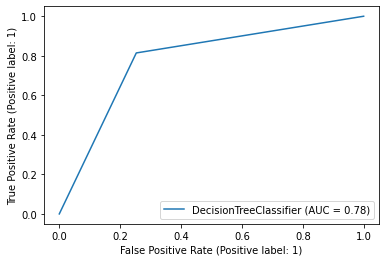

In [62]:
RocCurveDisplay.from_estimator(Fclf,Xf_test,yf_test)

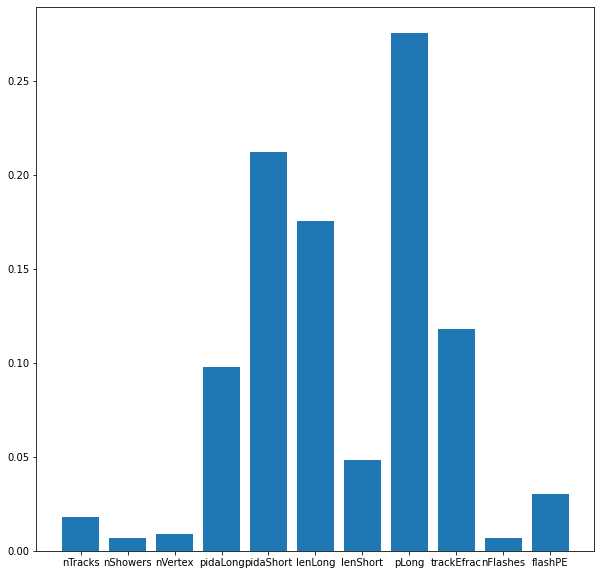

In [63]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [64]:
Fgbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
Fgbc500.fit(Xf_train,yf_train)
Fgbc500.score(Xf_test,yf_test)

0.8425925925925926

In [65]:
Fgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Fgbc5.fit(Xf_train,yf_train)
Fgbc5.score(Xf_test,yf_test)

0.8388888888888889

In [66]:
Fgbc.feature_importances_

array([0.01821689, 0.00684199, 0.00893771, 0.09791155, 0.21260359,
       0.17589928, 0.04840479, 0.27572467, 0.11821876, 0.0070671 ,
       0.03017367])

# What about an SVC? 

In [67]:
Fsvc = svm.NuSVC(gamma="auto")
Fsvc.fit(Xf_train,yf_train)
Fsvc_score = Fsvc.score(Xf_test,yf_test)

In [68]:
from sklearn.neural_network import MLPClassifier
FnnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score = FnnCLF.score(Xf_test,yf_test)

# How do the scores match up?

In [69]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

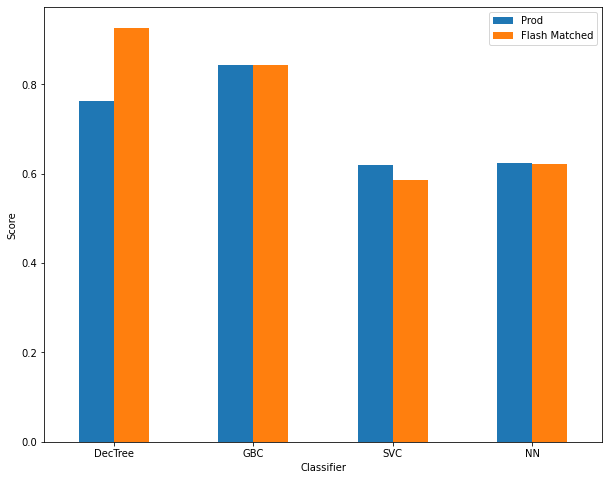

In [70]:
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)

[ 0.00308673  0.00683296 -0.00229261 -0.013929    0.05273936  0.12780475
 -0.02768105 -0.16030923  0.01154825  0.00018375  0.00201609]


Text(-0.11, flashPE, 'Flash Matched')

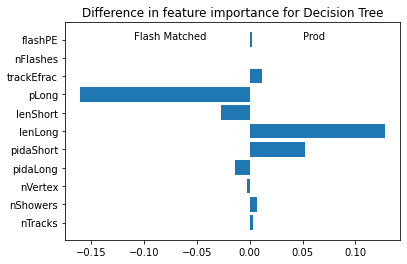

In [92]:
import_diff = clf.feature_importances_ - Fclf.feature_importances_
print(import_diff)
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Decision Tree")
plt.annotate("Prod",xy=[.05,"flashPE"])
plt.annotate("Flash Matched",xy=[-.11,"flashPE"])

[-0.00593707  0.0001197   0.00898349 -0.0016171   0.04465139  0.04838683
  0.00448078 -0.0896605  -0.01454968 -0.00066122  0.00580336]


Text(-0.06, flashPE, 'Flash Matched')

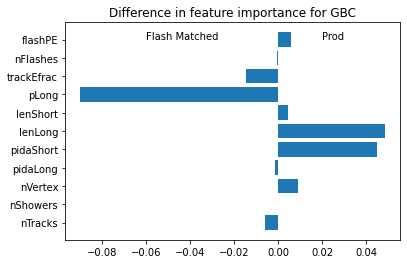

In [94]:
import_diff = gbc.feature_importances_ - Fgbc.feature_importances_
print(import_diff)
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for GBC")
plt.annotate("Prod",xy=[.02,"flashPE"])
plt.annotate("Flash Matched",xy=[-.06,"flashPE"])

# It seems the importance of the enery (momentum) increases when better t0 matching (flash matching) is implemented?